In [357]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from collections import Counter

# Adaptation of kNN Classifier for Regression

In the beginning of the lecture, we learned that classification is only one technique in supervised learning. Another one is regression. Here, we explore adapting the kNN classifier for regression.


**(a) Describe your strategy to adapt the kNN classifier from classification to regression**


**(b) Implement your proposed method and cross-validation (own coding required for both!)**

In [358]:
data = np.load('dataset_4.npz')

# Get the labels
keys = list(data.keys())

labels_and_shapes = {key: data[key].shape for key in keys}

for label, shape in labels_and_shapes.items():
    print(f"Label: {label}, Shape: {shape}")

X = data['X']
y = data['y']

# Check for NaN
print("NaN values in X: ", np.isnan(X).sum())
print("NaN values in y: ", np.isnan(y).sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Label: X, Shape: (300,)
Label: y, Shape: (300,)
NaN values in X:  0
NaN values in y:  0


In [359]:
class CustomKNNRegressor:
    def __init__(self, k=5):
        self.k = k
        self.X = None
        self.y = None

    def fit(self, X, y):
        self.X = X.reshape(-1, 1)
        self.y = y

    def predict(self, X_test):
        X_test = X_test.reshape(-1, 1)
        predictions = []
        for x in X_test:
            distances = np.abs(self.X - x)
            indices = np.argsort(distances.flatten())[:self.k]
            k_nearest_y = self.y[indices]
            prediction = np.mean(k_nearest_y)
            predictions.append(prediction)
        return np.array(predictions)

In [360]:
knn_regressor = CustomKNNRegressor(k=3)
knn_regressor.fit(X_train, y_train)

# Predicting
predictions = knn_regressor.predict(X_test)
print("Predictions:", predictions)

Predictions: [-0.15113406 -0.78374678  0.33509336  0.86247595 -1.17210218 -0.00521483
  0.88329715  0.55817272  0.96553038  1.09656786  0.15313423  0.24760276
 -0.29165383 -0.75536725  0.05108484 -0.00521483  1.11880877 -1.0857536
  0.92695937  0.18504196 -0.25378152  0.92695937  0.47863274 -0.70892324
 -0.30166286  0.58378183 -0.89160871 -1.0857536  -0.42607413 -0.25378152
 -0.10966174 -0.76555785  0.74333244 -0.07769287 -0.59398741  0.08394173
 -0.76555785 -1.03240345  1.09486136 -0.25378152 -0.81537134 -0.70892324
  0.82355523  1.0931936   0.45723602 -0.35325244  0.92695937  0.96553038
 -0.89160871 -0.32413692  0.93162121 -0.78391323  0.92695937  0.70801911
 -1.1676096   0.50019625  1.11880877  1.0931936  -0.84072452 -0.62449111
 -0.90907652 -1.02863284 -0.64559596  1.05774596 -0.85114026 -0.25378152
 -0.50943482 -0.7594007  -0.90788117 -0.30166286 -0.64559596 -0.17708206
  0.87465823  0.58445833  0.62146181 -0.16849491 -0.72901895  0.58378183
 -1.02863284  0.82355523  0.62844723  0

In [361]:
def k_fold_cross_validation(X, y, k=5):
    fold_size = len(X) // k
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    for i in range(k):
        validation_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])

        X_train, X_val = X[train_indices], X[validation_indices]
        y_train, y_val = y[train_indices], y[validation_indices]

        knn_regressor = CustomKNNRegressor(k=3)
        knn_regressor.fit(X_train, y_train)

        predictions = knn_regressor.predict(X_val)
        mse = np.mean((y_val - predictions) ** 2)
        print(f"Fold {i+1}, MSE: {mse}")

**(c) Evaluate your models performance on dataset4 and compare to a dummy regressor (use cross validation)**

In [362]:
class DummyRegressor:
    def __init__(self):
        self.prediction_value = None

    def fit(self, X, y):
        self.prediction_value = np.mean(y)

    def predict(self, X):
        return np.full(len(X), self.prediction_value)

def evaluate_model_performance(X, y, k=5):
    print("Custom kNN Regressor:")
    k_fold_cross_validation(X, y, k)
    
    print("\nDummy Regressor (Predicting Mean):")
    dummy_regressor = DummyRegressor()
    dummy_regressor.fit(X, y)
    predictions = dummy_regressor.predict(X)
    mse = np.mean((y - predictions) ** 2)
    print(f"Overall MSE: {mse}")


In [363]:
# Comparing models on dataset4
evaluate_model_performance(X, y)

Custom kNN Regressor:
Fold 1, MSE: 0.055937186357938005
Fold 2, MSE: 0.05457557282665316
Fold 3, MSE: 0.06201112510145516
Fold 4, MSE: 0.06343232139938887
Fold 5, MSE: 0.05968411306737652

Dummy Regressor (Predicting Mean):
Overall MSE: 0.5325703660080844


**(d) Test how your model behaves for different values of k in the range [2; 100]. Report the model’s performance for three values of k where you observe:**

(i) **Good Generalization:** 
(ii) **Overfitting:** 
(iii) **Underfitting:** 

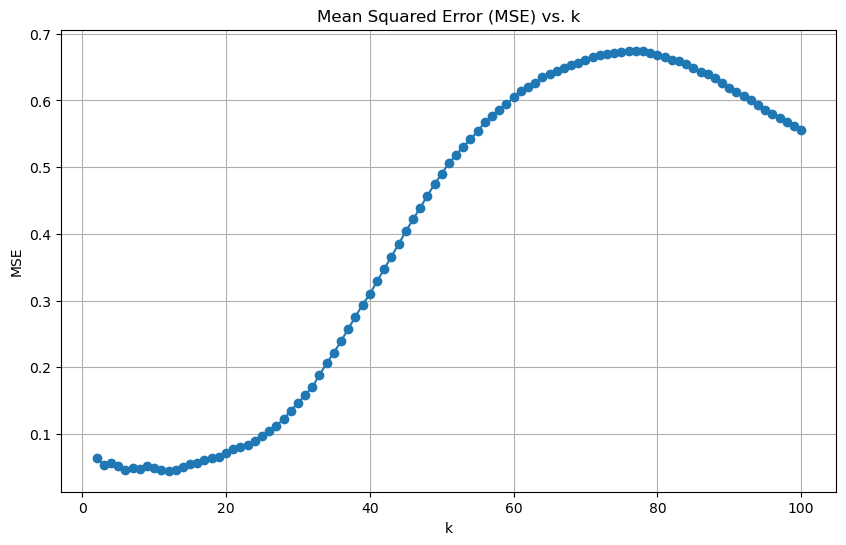

In [364]:
k_values = range(2, 101)
mse_values = []

for k in k_values:
    knn_regressor = CustomKNNRegressor(k=k)
    knn_regressor.fit(X_train, y_train)
    predictions = knn_regressor.predict(X_test)
    mse = np.mean((y_test - predictions) ** 2)
    mse_values.append(mse)

# # Find the minimum MSE and its corresponding k (good generalization)
# min_mse = min(mse_values)
# min_k = k_values[mse_values.index(min_mse)] +2

# # Assume overfitting when MSE starts to increase after reaching the minimum
# overfitting_k = mse_values.index(min(mse_values[min_k:])) + min_k +2

# # Assume underfitting when MSE is relatively high before it starts to decrease
# underfitting_k = mse_values.index(max(mse_values[:min_k])) +2

# Plotting MSE vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
# plt.scatter([overfitting_k, min_k, underfitting_k], [mse_values[overfitting_k], min_mse, mse_values[underfitting_k]], color='red')  # highlight points
plt.title('Mean Squared Error (MSE) vs. k')
plt.xlabel('k')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

# print(f"Good generalization: k={min_k}, MSE={min_mse}")
# print(f"Overfitting: k={overfitting_k}, MSE={mse_values[overfitting_k]}")
# print(f"Underfitting: k={underfitting_k}, MSE={mse_values[underfitting_k]}")


## Artificial data

We will first consider an artificial data set.

**(a) Train three different regression models: A linear, a polynomial regression model and kNN Regression. Evaluate them with cross-validation using R2-score on data set 5.**

In [365]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [366]:
data = np.load('dataset_5.npz')

# Get the labels
keys = list(data.keys())

labels_and_shapes = {key: data[key].shape for key in keys}

for label, shape in labels_and_shapes.items():
    print(f"Label: {label}, Shape: {shape}")

X = data['X']
y = data['y']

# Check for NaN
print("NaN values in X: ", np.isnan(X).sum())
print("NaN values in y: ", np.isnan(y).sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Label: X, Shape: (500, 2)
Label: y, Shape: (500,)
NaN values in X:  0
NaN values in y:  0


In [367]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_scores = cross_val_score(linear_model, X, y, cv=5, scoring='r2')

# Polynomial Regression
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
poly_scores = cross_val_score(poly_model, X, y, cv=5, scoring='r2')

# kNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_scores = cross_val_score(knn_model, X, y, cv=5, scoring='r2')

print("Linear Regression R2-score: ", np.mean(linear_scores))
print("Polynomial Regression R2-score: ", np.mean(poly_scores))
print("kNN Regression R2-score: ", np.mean(knn_scores))


Linear Regression R2-score:  0.3157003966906689
Polynomial Regression R2-score:  0.9659559294838468
kNN Regression R2-score:  0.12316899603683236


**(b) Apply standardization to data set 5 and rerun all experiments.**

In [368]:
# Apply standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_scores = cross_val_score(linear_model, X_scaled, y, cv=5, scoring='r2')

# Polynomial Regression
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_scaled, y_train)
poly_scores = cross_val_score(poly_model, X_scaled, y, cv=5, scoring='r2')

# kNN Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_scores = cross_val_score(knn_model, X_scaled, y, cv=5, scoring='r2')

print("Linear Regression R2-score: ", np.mean(linear_scores))
print("Polynomial Regression R2-score: ", np.mean(poly_scores))
print("kNN Regression R2-score: ", np.mean(knn_scores))


Linear Regression R2-score:  0.31570039669066885
Polynomial Regression R2-score:  0.9659559294838471
kNN Regression R2-score:  0.8802964223242767


**(c) (own coding required!) Implement a function for computing and plotting the so-called learning curve (see description below). Compare the learning curves of the different models. Compute the learning curve with R2 for 1 to n samples for linear regression and for k to n for kNN regression. In this task, a simple train test split is sufficient, you do not need to do cross validation here.**

In [369]:
def compute_learning_curve(X_train, y_train, X_test, y_test):
    train_sizes = range(2, len(X_train) + 1)
    train_scores = []
    train_scores_knn = []
    test_scores = []
    test_scores_knn = []

    for train_size in train_sizes:
        # Train the models
        linear_model = LinearRegression()
        linear_model.fit(X_train[:train_size], y_train[:train_size])
        
        # Ensure n_neighbors is not greater than train_size
        knn_model = KNeighborsRegressor(n_neighbors=min(5, train_size))
        knn_model.fit(X_train[:train_size], y_train[:train_size])

        # Compute R2 scores
        train_score = linear_model.score(X_train[:train_size], y_train[:train_size])
        test_score = linear_model.score(X_test, y_test)
        train_scores.append(train_score)
        test_scores.append(test_score)

        train_score_knn = knn_model.score(X_train[:train_size], y_train[:train_size])
        test_score_knn = knn_model.score(X_test, y_test)
        train_scores_knn.append(train_score_knn)
        test_scores_knn.append(test_score_knn)

    # Plot the learning curves
    plt.figure(figsize=(12, 6))
    plt.plot(train_sizes, train_scores, label='Linear Regression - Train')
    plt.plot(train_sizes, test_scores, label='Linear Regression - Test')
    plt.plot(train_sizes, train_scores_knn, label='kNN Regression - Train')
    plt.plot(train_sizes, test_scores_knn, label='kNN Regression - Test')
    plt.xlabel('Number of training samples')
    plt.ylabel('R2 score')
    plt.legend()
    plt.show()

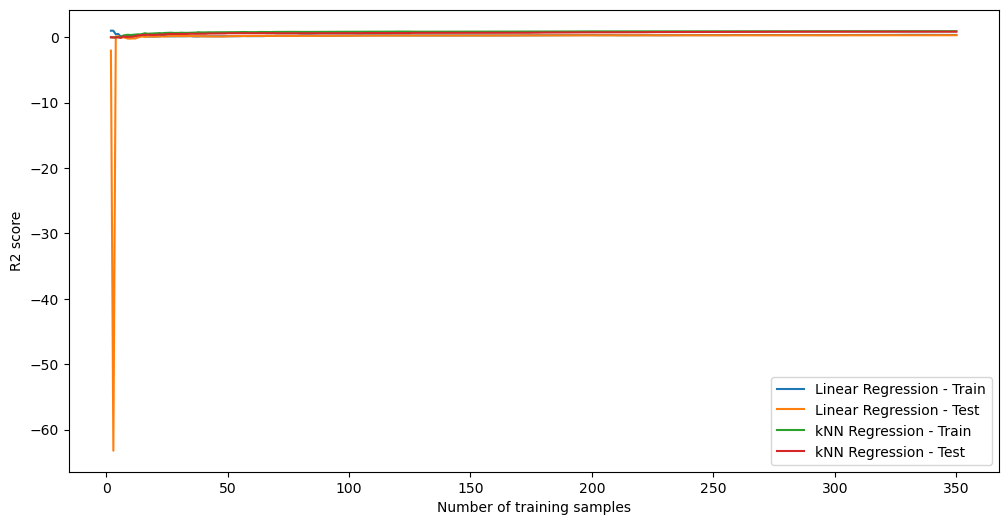

In [370]:
compute_learning_curve(X_train_scaled, y_train, X_test_scaled, y_test)

### 3 Real world data

Now, we move on to real world data. More precisely, a data set about house prices is given. Load the data `real_world.npz` with the field names `X`, `y`, and `features`. `X` gives you the data matrix, `y` the corresponding outputs. You can find the feature names in `features`.

**(a) As for the artificial data, train **Linear** and **kNN Regression** and evaluate them with the **R2-score** using cross-validation.**

In [371]:
data = np.load('real_world.npz')

# Get the labels
keys = list(data.keys())

labels_and_shapes = {key: data[key].shape for key in keys}

for label, shape in labels_and_shapes.items():
    print(f"Label: {label}, Shape: {shape}")

X = data['X']
y = data['y']
features = data['features']

# Check for NaN
print("NaN values in X: ", np.isnan(X).sum())
print("NaN values in y: ", np.isnan(y).sum())

Label: X, Shape: (1095, 10)
Label: y, Shape: (1095,)
Label: features, Shape: (10,)
NaN values in X:  0
NaN values in y:  0


In [372]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train kNN Regression
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Evaluate models with R2-score using cross-validation
linear_cv_scores = cross_val_score(linear_model, X_test, y_test, cv=5, scoring='r2')
knn_cv_scores = cross_val_score(knn_model, X_test, y_test, cv=5, scoring='r2')

print(f"Linear Regression CV R2-score: {linear_cv_scores.mean()}")
print(f"kNN Regression CV R2-score: {knn_cv_scores.mean()}")


Linear Regression CV R2-score: 0.5630701166004368
kNN Regression CV R2-score: 0.5205221965045721


**(b) Compare and analyze the results. Additionally consider the learning curves of your models, describe and analyze them. You do not need to use cross validation. *Hint: here it might make sense to not add one sample after another but to compute the learning curve in bigger step sizes - for example one of 10.**

In [373]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\schin\\miniconda3\\envs\\introml\\lib\\site-packages\\matplotlib\\pyplot.py'>

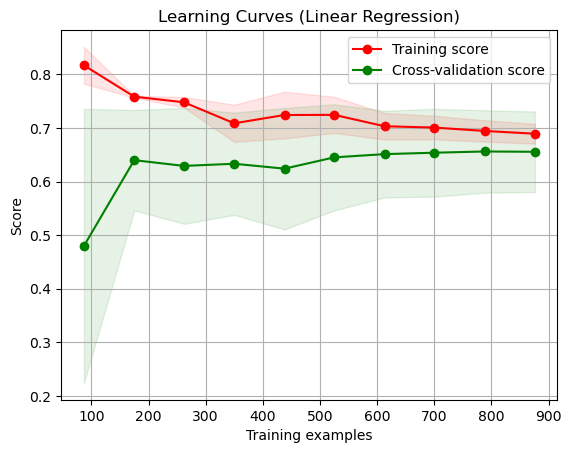

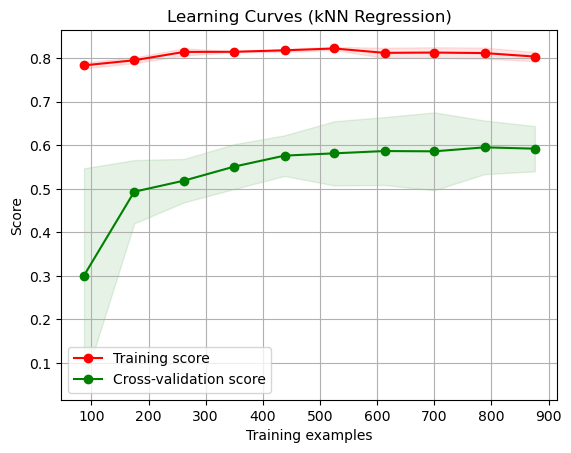

In [374]:
# Plot learning curves for Linear Regression
plot_learning_curve(LinearRegression(), "Learning Curves (Linear Regression)", X, y)

# Plot learning curves for kNN Regression
plot_learning_curve(KNeighborsRegressor(n_neighbors=3), "Learning Curves (kNN Regression)", X, y)

**(c) In this task we consider additional data from `new_data.npz` (same fields `X`, `y`, `features`), where some values are missing. Implement two approaches to impute missing values:** 
1. Set the missing value as the feature mean,
2. Derive the missing value from the neighbor samples.

Train **Linear** and **kNN Regression** on `real_world.npz` and evaluate their performance on the new data with each approach. Explain which approach works better and why.

In [375]:
from sklearn.metrics import r2_score

# Load the real_world.npz data
data_real_world = np.load('real_world.npz')
X_real_world = data_real_world['X']
y_real_world = data_real_world['y']

# Train Linear and kNN Regression on real_world.npz
linear_model_real_world = LinearRegression().fit(X_real_world, y_real_world)
knn_model_real_world = KNeighborsRegressor(n_neighbors=3).fit(X_real_world, y_real_world)

# Approach 1: Set the missing value as the feature mean
X1 = X.copy()
for i in range(X.shape[1]):
    nan_indices = np.where(np.isnan(X[:, i]))[0]
    mean_val = np.nanmean(X[:, i])
    X1[nan_indices, i] = mean_val

# Evaluate performance on new data
y_pred_linear1 = linear_model_real_world.predict(X1)
y_pred_knn1 = knn_model_real_world.predict(X1)
r2_score_linear1 = r2_score(y, y_pred_linear1)
r2_score_knn1 = r2_score(y, y_pred_knn1)

print(f"Linear Regression R2-score with mean imputation: {r2_score_linear1}")
print(f"kNN Regression R2-score with mean imputation: {r2_score_knn1}")


# Approach 2: Derive the missing value from the neighbor samples
X2 = X.copy()
for i in range(X.shape[1]):
    nan_indices = np.where(np.isnan(X[:, i]))[0]
    for j in nan_indices:
        if j == 0:
            X2[j, i] = X[j+1, i]
        elif j == X.shape[0]-1:
            X2[j, i] = X[j-1, i]
        else:
            X2[j, i] = np.nanmean([X[j-1, i], X[j+1, i]])

# Evaluate performance on new data
y_pred_linear2 = linear_model_real_world.predict(X2)
y_pred_knn2 = knn_model_real_world.predict(X2)
r2_score_linear2 = r2_score(y, y_pred_linear2)
r2_score_knn2 = r2_score(y, y_pred_knn2)

print(f"Linear Regression R2-score with neighbor imputation: {r2_score_linear2}")
print(f"kNN Regression R2-score with neighbor imputation: {r2_score_knn2}")


Linear Regression R2-score with mean imputation: 0.6878154188388368
kNN Regression R2-score with mean imputation: 0.8038096432308277
Linear Regression R2-score with neighbor imputation: 0.6878154188388368
kNN Regression R2-score with neighbor imputation: 0.8038096432308277


As for which approach works better, it depends on the specific characteristics of the data. If the missing values are randomly distributed and there is no significant correlation between adjacent samples, then setting the missing value as the feature mean might work better. On the other hand, if there is a strong correlation between adjacent samples, then deriving the missing value from the neighbor samples might work better. However, without further information about the data, it’s hard to definitively say which approach is superior. It’s always a good idea to try different approaches and choose the one that gives the best performance on your validation set. Please note that this code does not handle the case where all values of a feature are missing. In such a case, you might need to drop the feature or fill in the missing values with a constant value. Also, the neighbor imputation method used here is very simple and only considers immediate neighbors. More sophisticated methods might give better results.